# Customer Churn  Prediction Model

### Reading and Understanding the Data

In [1]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.DataFrame(pd.read_csv("/content/CSP_Data.csv"))

In [3]:
# Check the head of the dataset
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


###  Data overview

In [4]:
# Here we have given ‘display.max_columns’ as an argument to view the maximum columns from our dataframe.
pd.set_option('display.max_columns', None)

In [5]:
#Check the shape of dataset
data.shape

(388, 55)

In [6]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [7]:
# Describe Dataset
data.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


This way we can quickly see basic metrics like average, median, percentile for different features.

In [8]:
# describe categorical values columns
data.describe(include = 'object').transpose()

,count,unique,top,freq
Gender,388,2,Male,222
Marital Status,388,3,Single,268
Occupation,388,4,Student,207
Monthly Income,388,5,No Income,187
Educational Qualifications,388,5,Graduate,177
Medium (P1),388,4,Food delivery apps,358
Medium (P2),388,3,Direct call,208
Meal(P1),388,4,Snacks,124
Meal(P2),388,3,Dinner,312
Perference(P1),388,4,Non Veg foods (Lunch / Dinner),315


### Data Cleaning

Data cleaning is one of the important parts of machine learning. It plays a significant part in building a model. It surely isn’t the fanciest part of machine learning and at the same time, there aren’t any hidden tricks or secrets to uncover.

If we have a well-cleaned dataset, there are chances that we can get achieve good results with simple algorithms also, which can prove very beneficial at times especially in terms of computation when the dataset size is large. 

In [9]:
#Look for missing values / Null values

data.isnull().sum()

Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food qua

In [10]:
# Checking for duplicate
data.duplicated().sum()

102

In [11]:
# dropping duplicate values
data.drop_duplicates(keep=False,inplace=True)
data.shape

(222, 55)

In [12]:
# Reviews  columns have maximum NIL values and It will not add any value to prediction 
data.drop(labels=['Reviews'],axis=1,inplace=True) 

Observations:

1. Data size is (388, 55).

2. None of the columns has Null values.

3. There is 102 duplicated value in this dataset .

4. Age, Family, size, latitude,	longitude and Pin code has numerical values .

5. Maximum columns has categorical values.


### Exploratory Data Analytics


#### Visualising Numeric Variables

Let's make a dist plot of all the numeric variables

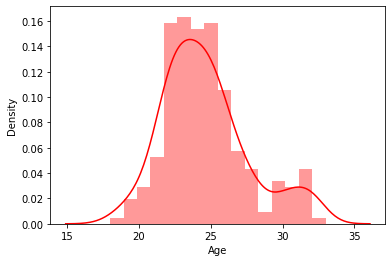

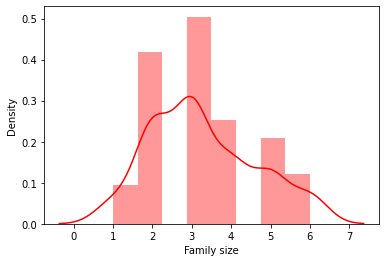

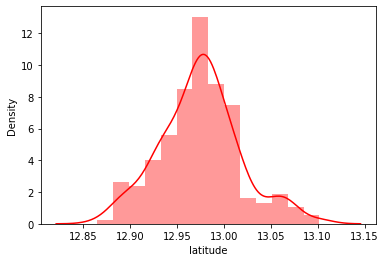

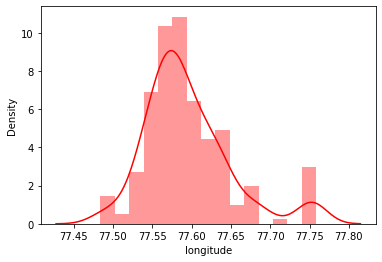

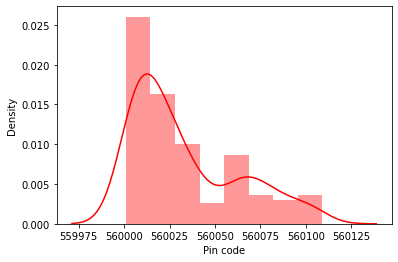

In [13]:
df_numerics_only = data.select_dtypes(include=np.number)
for column in df_numerics_only.columns:
    
    sns.distplot(data[column],color="red") # Stack these distributions together with different colors 
    plt.show()


Observations:

The Distplot of Age ,latitude  and longitude column are approximately normally distributed. And if we see other columns like Family size and pincode these are not normally distributed.

#### Visualising Categorical Variables


#### Distribution of output

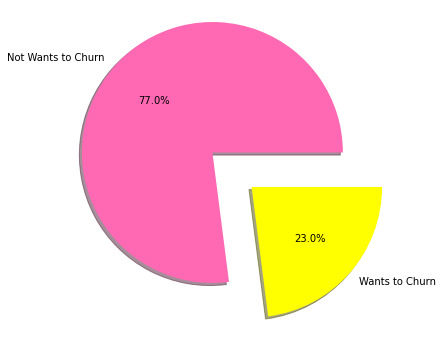

In [14]:
#Churn rate
plt.figure(figsize=(10,6))
labels=['Not Wants to Churn', 'Wants to Churn']
explode=[.2,.2]
mycolors = ["hotpink", "Yellow"]
sizes=data.Output.value_counts().values
plt.pie(sizes,explode,labels,autopct="%1.1f%%",shadow = True,colors = mycolors)
plt.show()

From the above pip plot, we can say that approximately 77% of customers do not want to Churn and 23% of customers want to churn.

#### Observations on Age

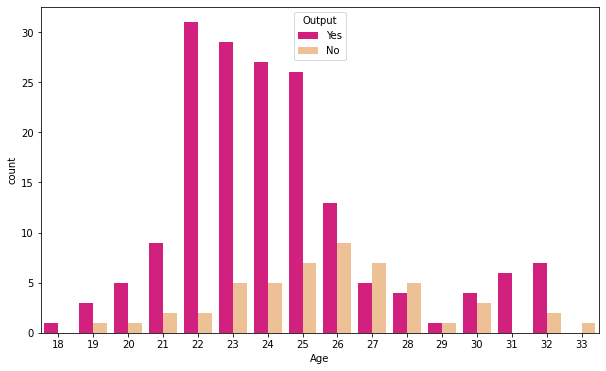

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x="Age", data=data, hue='Output',palette='Accent_r')

From the above count plot, We can tell That More than 30 customers who are 22 years old want to churn and those customers who are 33 years old don't want to churn.

#### Observations on Gender, Marital Status, Occupation, Educational Qualifications, Self Cooking and Monthly Income

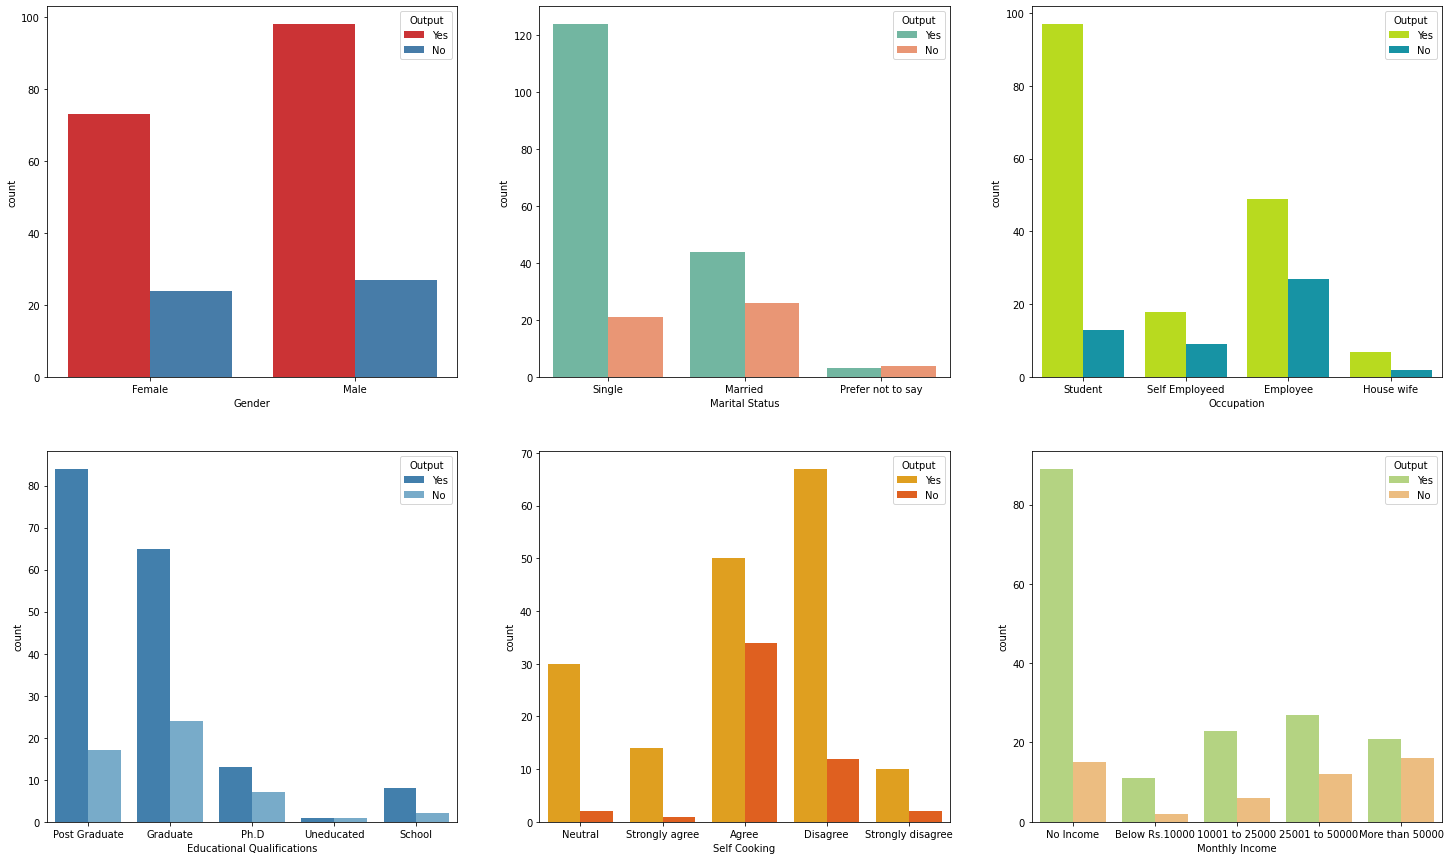

In [16]:
plt.figure(figsize=(25, 15))
plt.subplot(2,3,1)
sns.countplot(x ='Gender', data = data, hue='Output', palette = "Set1")
plt.subplot(2,3,2)
sns.countplot(x ='Marital Status', data = data, hue='Output',palette='Set2')
plt.subplot(2,3,3)
sns.countplot(x ='Occupation', data = data, hue='Output',palette='nipy_spectral_r')
plt.subplot(2,3,4)
sns.countplot(x ='Educational Qualifications', hue='Output', data = data,palette='tab20c')
plt.subplot(2,3,5)
sns.countplot(x ='Self Cooking', data = data, hue='Output',palette='autumn_r')
plt.subplot(2,3,6)
sns.countplot(x ='Monthly Income', data = data, hue='Output',palette='RdYlGn_r')
plt.show()

Observations:
1. Men want to churn more than women.
2. Maximum customers who want to churn, who are still single and this number is more than 120.
3. Most of all those customers want to churn who are students. And the lowest churn percentage is among employees.
4. Post Graduates want to churn Maximum and after that graduates want to churn.
5. Those customers who do not have income, they want to churn maximum. And those customers want to churn less, whose income is more than 50,000.

#### Observations on Unavailability, Less Delivery time, Maximum wait time, Freshness and Monthly more

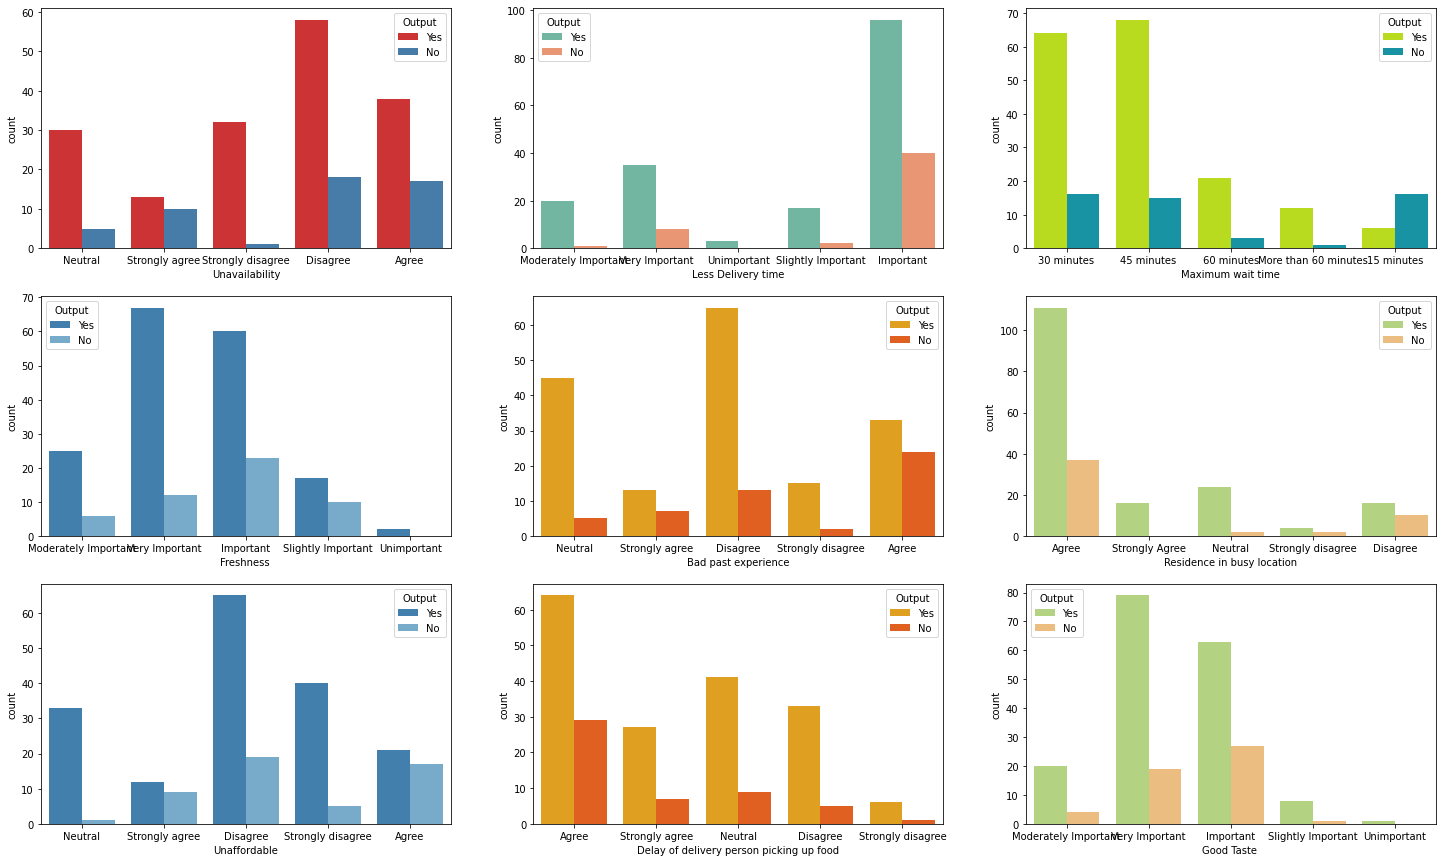

In [17]:
plt.figure(figsize=(25, 15))
plt.subplot(3,3,1)
sns.countplot(x ='Unavailability', data = data, hue='Output', palette = "Set1")
plt.subplot(3,3,2)
sns.countplot(x ='Less Delivery time', data = data, hue='Output',palette='Set2')
plt.subplot(3,3,3)
sns.countplot(x ='Maximum wait time', data = data, hue='Output',palette='nipy_spectral_r')
plt.subplot(3,3,4)
sns.countplot(x ='Freshness ', hue='Output', data = data,palette='tab20c')
plt.subplot(3,3,5)
sns.countplot(x ='Bad past experience', data = data, hue='Output',palette='autumn_r')
plt.subplot(3,3,6)
sns.countplot(x ='Residence in busy location', data = data, hue='Output',palette='RdYlGn_r')
plt.subplot(3,3,7)
sns.countplot(x ='Unaffordable', hue='Output', data = data,palette='tab20c')
plt.subplot(3,3,8)
sns.countplot(x ='Delay of delivery person picking up food', data = data, hue='Output',palette='autumn_r')
plt.subplot(3,3,9)
sns.countplot(x ='Good Taste ', data = data, hue='Output',palette='RdYlGn_r')
plt.show()

Observations:
1. Those customers want to churn more For whom short delivery time is very important.
2. Those customers who had to wait for maximum for the order want to churn more.
3. Customers who had a bad past experience want to churn more.
4. Customers for whom freshness is very important, want to churn more.
5. Those customers who are not able to afford the service want to churn more.
6. Customers that place a high value on good taste, want to churn more.
7. Customers who have delayed food delivery, want to churn more.

### Outlier Detection

Outliers are the values that look different from the other values in the data. 

Box plots are a visual method to identify outliers. Box plots is one of the many ways to visualize data distribution. Box plot plots the q1 (25th percentile), q2 (50th percentile or median) and q3 (75th percentile) of the data along with (q1–1.5*(q3-q1)) and (q3+1.5*(q3-q1)). Outliers, if any, are plotted as points left and right the plot.

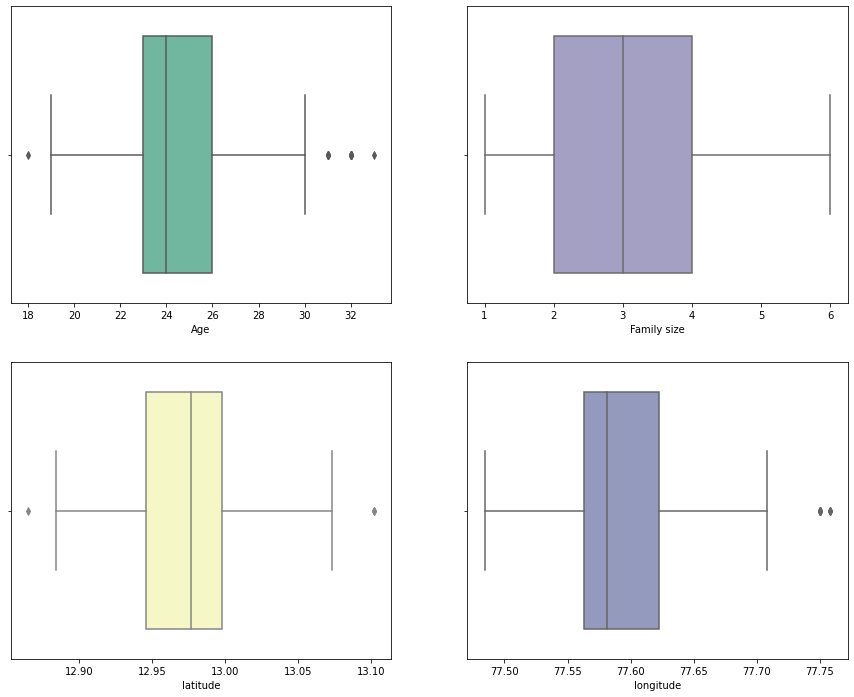

In [18]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (15,12))
plt1 = sns.boxplot(data['Age'], ax = axs[0,0],palette='BuGn')
plt2 = sns.boxplot(data['Family size'], ax = axs[0,1],palette='Purples_r')
plt3 = sns.boxplot(data['latitude'], ax = axs[1,0],palette='RdYlGn')
plt1 = sns.boxplot(data['longitude'], ax = axs[1,1],palette='BuPu')

plt.show()

Outlier Treatment :
1. Age , latitude and longitude have considerable some outliers.
2. We can drop the outliers as we have sufficient data.

In [19]:
# outlier treatment for Age
Q1 = data.Age.quantile(0.25)
Q3 = data.Age.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.Age >= Q1 - 1.5*IQR) & (data.Age <= Q3 + 1.5*IQR)]

In [20]:
# outlier treatment for latitude
Q1 = data.latitude.quantile(0.25)
Q3 = data.latitude.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.latitude >= Q1 - 1.5*IQR) & (data.latitude <= Q3 + 1.5*IQR)]

In [21]:
# outlier treatment for longitude
Q1 = data.longitude.quantile(0.25)
Q3 = data.longitude.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.longitude >= Q1 - 1.5*IQR) & (data.longitude <= Q3 + 1.5*IQR)]

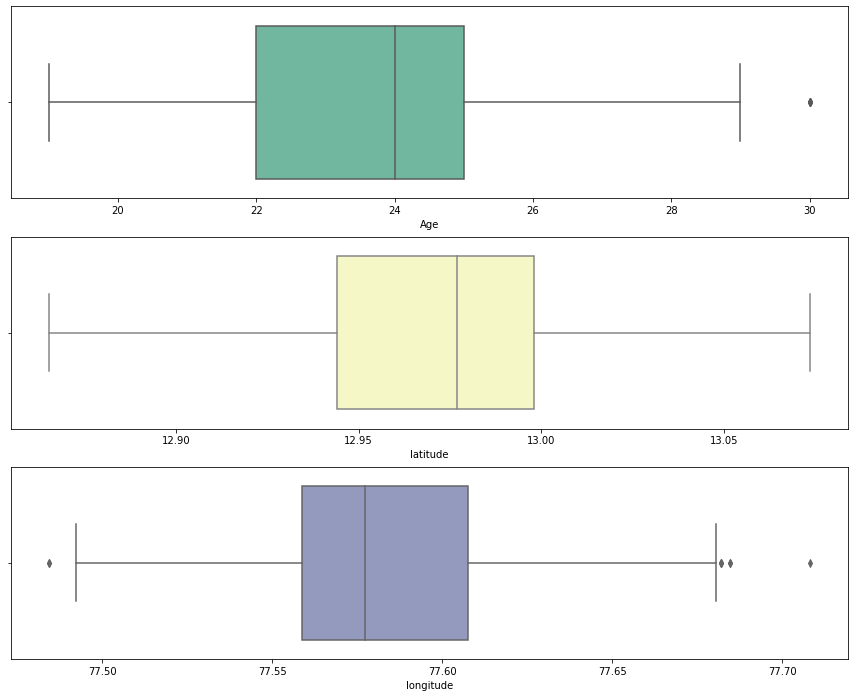

In [22]:
# Outlier check after treatment
fig, axs = plt.subplots(3,1, figsize = (15,12))
plt1 = sns.boxplot(data['Age'], ax = axs[0],palette='BuGn')
plt2 = sns.boxplot(data['latitude'], ax = axs[1],palette='RdYlGn')
plt3 = sns.boxplot(data['longitude'], ax = axs[2],palette='BuPu')

plt.show()

Here we removed lot of outliers, It's look good.

### Feature Selection Technique

### Pearson correlation for numerical variable

Pearson correlation is used to measure how strong the relationship is between two variables.

Features with high correlation are mostly Linearley dependent and hence have almost the same effect on the dependent variable. So when two features have a high correlation, we can drop one of the two features.

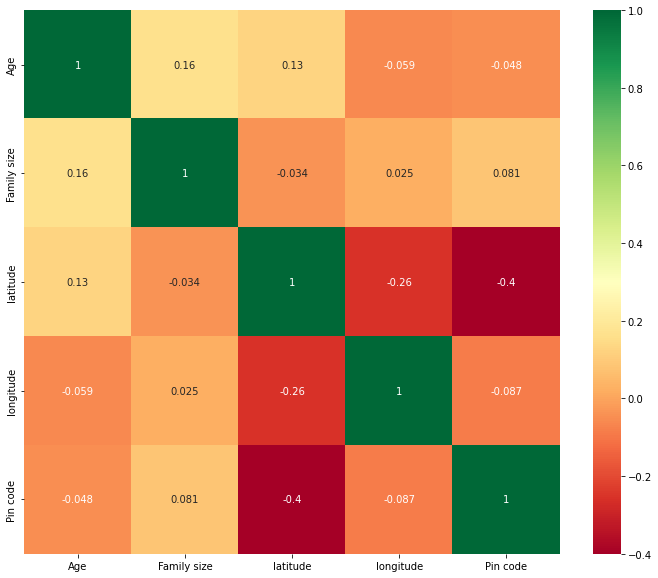

In [23]:
#Displaying Correlation between varaibles using heatmap
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlGn)
plt.show()

In [24]:
#This function filters out most correlated variables, threshold values is decided by us like 80% or more than that 
def correlation(data,threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [25]:
#Getting ALL feature who are correlated to each other and had correlation values more than 60%
corr_feature = correlation(data, 0.6)
len(set(corr_feature))

0

Features selected on the basis of Pearson Correlation, and the features having correlation value more than 60% are dropped from the dataset as the have same effect over target variable .

There is not avialible highely correlated variables.

### Handle Categorical Data

Categorical data refers to the information that has specific categories within the dataset. In the dataset cited above, there are many categorical variables .

Machine Learning models are primarily based on mathematical equations. Thus, you can intuitively understand that keeping the categorical data in the equation will cause certain issues since you would only need numbers in the equations.

In [26]:
#Getting list of categorical variable
objList = data.select_dtypes(include = "object").columns
print (objList)

Index(['Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)',
       'Meal(P2)', 'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of rating', 'Less Delivery time',
       'High Quality of package', '

In [27]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Converting all categorical variable to numerical values
for feat in objList:
    data[feat] = le.fit_transform(data[feat])

### Chi Square Test

Chi-Square test is a statistical method to determine if two categorical variables have a significant correlation between them. 

In [28]:
# Applying Chi Squared test
# importing the chi2 library
from sklearn.feature_selection import chi2

In [29]:
df= data[['Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)',
       'Meal(P2)', 'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of rating', 'Less Delivery time',
       'High Quality of package', 'Number of calls', 'Politeness',
       'Freshness ', 'Temperature', 'Good Taste ', 'Good Quantity', 'Output']]

In [30]:
#split df dataset in features and target variable
x1=df.drop('Output',axis='columns') # independent vatiable 
y1=df['Output'] # dependent vatiable 

In [31]:
#returns f score and p value 
f_score = chi2(x1,y1) 

In [32]:
p_value = pd.Series(f_score[1],index = x1.columns)
# sort p value series
p_value = p_value.sort_values(ascending = True)
# print p value 
print(p_value)

Self Cooking                                 0.000006
Less Delivery time                           0.000601
Occupation                                   0.001047
Marital Status                               0.002192
Maximum wait time                            0.002655
Health Concern                               0.005315
Residence in busy location                   0.005837
Unavailability                               0.009278
Bad past experience                          0.016209
Freshness                                    0.017767
Easy Payment option                          0.020905
Number of calls                              0.021110
Good Taste                                   0.030669
Unaffordable                                 0.039857
Educational Qualifications                   0.071282
High Quality of package                      0.109305
Delay of delivery person picking up food     0.131099
Long delivery time                           0.134390
Good Tracking system        

If p-value ≥0.05 ,failed to reject null hypothesis there is no any relationship between target variable and categorical features.

if p_value <0.05 ,Rejects null hypothesis and there will be some relationship between target variable and categorical features and we will take all that features for further machine learning pipeline.let’s get started……

In [33]:
corr_columns=[]
significance_level = 0.05
for i in p_value.index:
    if p_value[i] <= significance_level: 
        print(i,'    :- Reject NULL HYPOTHESIS') 
    else: 
        print(i,'   :-ACCEPT NULL HYPOTHESIS')
        corr_columns.append(i)
        

Self Cooking     :- Reject NULL HYPOTHESIS
Less Delivery time     :- Reject NULL HYPOTHESIS
Occupation     :- Reject NULL HYPOTHESIS
Marital Status     :- Reject NULL HYPOTHESIS
Maximum wait time     :- Reject NULL HYPOTHESIS
Health Concern     :- Reject NULL HYPOTHESIS
Residence in busy location     :- Reject NULL HYPOTHESIS
Unavailability     :- Reject NULL HYPOTHESIS
Bad past experience     :- Reject NULL HYPOTHESIS
Freshness      :- Reject NULL HYPOTHESIS
Easy Payment option     :- Reject NULL HYPOTHESIS
Number of calls     :- Reject NULL HYPOTHESIS
Good Taste      :- Reject NULL HYPOTHESIS
Unaffordable     :- Reject NULL HYPOTHESIS
Educational Qualifications    :-ACCEPT NULL HYPOTHESIS
High Quality of package    :-ACCEPT NULL HYPOTHESIS
Delay of delivery person picking up food    :-ACCEPT NULL HYPOTHESIS
Long delivery time    :-ACCEPT NULL HYPOTHESIS
Good Tracking system    :-ACCEPT NULL HYPOTHESIS
Low quantity low time    :-ACCEPT NULL HYPOTHESIS
Order placed by mistake    :-ACCE

If we see above plot we can conclude that Self Cooking, Less Delivery time, Occupation, Marital Status, Maximum wait time, Health Concern, Residence in busy location, Unavailability, Bad past experience, Freshness, Easy Payment option, Number of calls, Good Taste and Unaffordable features has p_value <= 0.05 hence they have have significance on target variable.

So we will only select Self Cooking, Less Delivery time, Occupation, Marital Status, Maximum wait time, Health Concern, Residence in busy location, Unavailability, Bad past experience, Freshness, Easy Payment option, Number of calls, Good Taste and Unaffordable for further machine learning modeling.

In [34]:
#dropping columns that will not add any value to prediction 
data.drop(labels=corr_columns,axis=1,inplace=True) 

In [35]:
data.head()

,Age,Marital Status,Occupation,Family size,latitude,longitude,Pin code,Easy Payment option,Self Cooking,Health Concern,Bad past experience,Unavailability,Unaffordable,Maximum wait time,Residence in busy location,Less Delivery time,Number of calls,Freshness,Good Taste,Output
0,20,2,3,4,12.9766,77.5993,560001,2,2,2,2,2,2,1,0,1,1,1,1,1
1,24,2,3,3,12.9770,77.5773,560009,3,3,3,3,3,3,1,3,4,4,4,4,1
14,23,2,2,5,12.9438,77.5738,560004,0,0,3,3,3,2,2,2,1,1,4,4,1
15,24,2,3,6,12.8893,77.6399,560068,3,3,3,1,2,1,1,3,1,1,4,4,1
16,28,2,0,2,12.9783,77.6408,560038,0,1,2,2,2,1,3,2,3,3,4,0,1


### Feature Scaling

Feature scaling is the process of normalising the range of features in a dataset.

Normalisation, also known as min-max scaling, is a scaling technique whereby the values in a column are shifted so that they are bounded between a fixed range of 0 and 1.

In [36]:
#Call the sklearn librart and import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [37]:
# instantiate the MinMaxScaler
scaler = MinMaxScaler()
data[['latitude','longitude','Pin code']] = scaler.fit_transform(data[['latitude','longitude','Pin code']])
print("Scaled Dataset Using MinMaxScaler")
data.head()

Scaled Dataset Using MinMaxScaler


,Age,Marital Status,Occupation,Family size,latitude,longitude,Pin code,Easy Payment option,Self Cooking,Health Concern,Bad past experience,Unavailability,Unaffordable,Maximum wait time,Residence in busy location,Less Delivery time,Number of calls,Freshness,Good Taste,Output
0,20,2,3,4,0.535062,0.514069,0.000000,2,2,2,2,2,2,1,0,1,1,1,1,1
1,24,2,3,3,0.536984,0.415811,0.074074,3,3,3,3,3,3,1,3,4,4,4,4,1
14,23,2,2,5,0.377522,0.400179,0.027778,0,0,3,3,3,2,2,2,1,1,4,4,1
15,24,2,3,6,0.115754,0.695400,0.620370,3,3,3,1,2,1,1,3,1,1,4,4,1
16,28,2,0,2,0.543228,0.699419,0.342593,0,1,2,2,2,1,3,2,3,3,4,0,1


### Balancing the dataset

SMOTE (Synthetic Minority Oversampling Technique) is an oversampling technique that generates synthetic samples for the minority class in an imbalanced classification dataset.
Imbalance means that the number of data points available for different classes is different. There are two classes, e.g. 90% points for one class and 10% for the other. Anything that has more the 79% and 21% ratio is said to be highly imbalanced data and they can cause serious problems to our ml models.

In [38]:
#split dataset in features and target variable
X = data.drop('Output',axis='columns')
y = data['Output']

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
#Now just import it into your program and then just simply fit your X and y value to you SMOTE
# Creating Object of SMOTE
sm = SMOTE(random_state = 23)
X_sm, y_sm = sm.fit_resample(X, y)

Now you have successfully created the X_sm and y_sm that that have your completely balanced dataset.

### Data Spliting

Splitting the dataset is the next step in data preprocessing in machine learning. Every dataset for Machine Learning model must be split into two separate sets – training set and test set. 

Training set denotes the subset of a dataset that is used for training the machine learning model. A test set, on the other hand, is the subset of the dataset that is used for testing the machine learning model. The ML model uses the test set to predict outcomes. 

Here, the second line splits the arrays of the dataset into random train and test subsets. Here includes four variables:

x_train – features for the training data

x_test – features for the test data

y_train – dependent variables for training data

y_test – independent variable for testing data

In [41]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=23)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((240, 19), (60, 19), (240,), (60,))

### Model Building

Machine Learning models can be understood as a program that has been trained to find patterns within new data and make predictions. These models are represented as a mathematical function that takes requests in the form of input data, makes predictions on input data, and then provides an output in response.

First, these models are trained over a set of data, and then they are provided an algorithm to reason over data, extract the pattern from feed data and learn from those data. Once these models get trained, they can be used to predict the unseen dataset.

### Random Forest

Random forest is a supervised learning algorithm which is used for both classification as well as regression. As we know that a forest is made up of trees and more trees means more robust forest. 

Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

In [56]:
# Let’s import RandomForestClassifier and fit the data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report

# instantiate the classifier 
classifier = RandomForestClassifier()

# fit the model
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)

In [58]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


In [59]:
#Get the F1-Score for  model
print("F1-Score:",f1_score(y_test, y_pred))

F1-Score: 0.9615384615384616


Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

We can print a classification report as follows:-

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.96      0.96      0.96        26

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



The model accuracy score  is 0.95 in the model. It's a good score

### Recommendations

1. Attempt to minimise wait times so that consumers who have had to wait the longest for an order do not churn.
2. Attempt to enhance previous experiences so that clients who are dissatisfied with previous experiences do not churn.
3. You can cut the price of some items or supply various bundles for those customers who cannot afford the service and wish to churn.
4. Customers who prioritise good taste are more likely to churn. As a result, make an effort to improve the excellent teste so that the client does not leave.
5. Customers who have had their meal deliveries delayed want to order more. As a result, attempt to deliver quickly so that the consumer does not leave.
6. Create a healthy environment for customers so that they do not churn.